In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [31]:
df = pd.read_csv("ecommerce_customer_data_large.csv")
df

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


In [32]:
df.info() 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [33]:
df['Returns'] = df['Returns'].fillna(0).astype(int)
df['Returns'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 250000 entries, 0 to 249999
Series name: Returns
Non-Null Count   Dtype
--------------   -----
250000 non-null  int32
dtypes: int32(1)
memory usage: 976.7 KB


In [34]:
# Convert `Purchase Date` dtype to Datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

# Split Year and Month into new columns
df['Purchase Year'] = df['Purchase Date'].dt.year
df['Purchase Month'] = df['Purchase Date'].dt.month_name()

df[['Purchase Date','Purchase Year','Purchase Month']]

,Purchase Date,Purchase Year,Purchase Month
0,2023-05-03 21:30:02,2023,May
1,2021-05-16 13:57:44,2021,May
2,2020-07-13 06:16:57,2020,July
3,2023-01-17 13:14:36,2023,January
4,2021-05-01 11:29:27,2021,May
...,...,...,...
249995,2023-01-24 12:32:18,2023,January
249996,2021-06-04 05:45:25,2021,June
249997,2022-11-10 17:11:57,2022,November
249998,2021-06-27 14:42:12,2021,June


In [35]:
df['Total Price'] = df['Product Price'] * df['Quantity']


# Re-order columns
cols = ['Customer ID','Customer Name','Purchase Date','Purchase Year','Purchase Month','Product Category','Product Price','Quantity','Total Price','Payment Method','Returns','Gender','Customer Age','Churn']
df = df[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Customer ID       250000 non-null  int64         
 1   Customer Name     250000 non-null  object        
 2   Purchase Date     250000 non-null  datetime64[ns]
 3   Purchase Year     250000 non-null  int32         
 4   Purchase Month    250000 non-null  object        
 5   Product Category  250000 non-null  object        
 6   Product Price     250000 non-null  int64         
 7   Quantity          250000 non-null  int64         
 8   Total Price       250000 non-null  int64         
 9   Payment Method    250000 non-null  object        
 10  Returns           250000 non-null  int32         
 11  Gender            250000 non-null  object        
 12  Customer Age      250000 non-null  int64         
 13  Churn             250000 non-null  int64         
dtypes: d

In [36]:
df.describe(include=['object'])

,Customer Name,Purchase Month,Product Category,Payment Method,Gender
count,250000,250000,250000,250000,250000
unique,39878,12,4,3,2
top,Michael Johnson,August,Electronics,Credit Card,Male
freq,119,23160,62630,83547,125676


In [37]:
df.describe(include='all')

,Customer ID,Customer Name,Purchase Date,Purchase Year,Purchase Month,Product Category,Product Price,Quantity,Total Price,Payment Method,Returns,Gender,Customer Age,Churn
count,250000.000000,250000,250000,250000.000000,250000,250000,250000.000000,250000.000000,250000.000000,250000,250000.000000,250000,250000.000000,250000.00000
unique,NaN,39878,NaN,NaN,12,4,NaN,NaN,NaN,3,NaN,2,NaN,NaN
top,NaN,Michael Johnson,NaN,NaN,August,Electronics,NaN,NaN,NaN,Credit Card,NaN,Male,NaN,NaN
freq,NaN,119,NaN,NaN,23160,62630,NaN,NaN,NaN,83547,NaN,125676,NaN,NaN
mean,25017.632092,NaN,2021-11-06 19:26:22.286192384,2021.377136,NaN,NaN,254.742724,3.004936,765.954660,NaN,0.405904,NaN,43.798276,0.20052
min,1.000000,NaN,2020-01-01 00:07:26,2020.000000,NaN,NaN,10.000000,1.000000,10.000000,NaN,0.000000,NaN,18.000000,0.00000
25%,12590.000000,NaN,2020-12-03 08:10:12,2020.000000,NaN,NaN,132.000000,2.000000,288.000000,NaN,0.000000,NaN,30.000000,0.00000
50%,25011.000000,NaN,2021-11-06 07:39:08.500000,2021.000000,NaN,NaN,255.000000,3.000000,604.000000,NaN,0.000000,NaN,44.000000,0.00000
75%,37441.250000,NaN,2022-10-11 01:21:56.249999872,2022.000000,NaN,NaN,377.000000,4.000000,1135.000000,NaN,1.000000,NaN,57.000000,0.00000
max,50000.000000,NaN,2023-09-13 18:42:49,2023.000000,NaN,NaN,500.000000,5.000000,2500.000000,NaN,1.000000,NaN,70.000000,1.00000


# PRODUCT CATEGORY ANALYSIS

In [38]:

product_category_distribution = df['Product Category'].value_counts().reset_index()
product_category_distribution.columns = ['Product Category', 'Count']

# Sort the data by count in descending order
product_category_distribution = product_category_distribution.sort_values(by='Count', ascending=False)
product_category_distribution

,Product Category,Count
0,Electronics,62630
1,Clothing,62581
2,Home,62542
3,Books,62247


In [39]:
# Calculate total sales by product category
product_category_sales = df.groupby('Product Category')['Total Price'].sum().reset_index()
product_category_sales = product_category_sales.sort_values(by='Total Price', ascending=False)
product_category_sales

,Product Category,Total Price
3,Home,48130856
1,Clothing,47977746
2,Electronics,47801925
0,Books,47578138


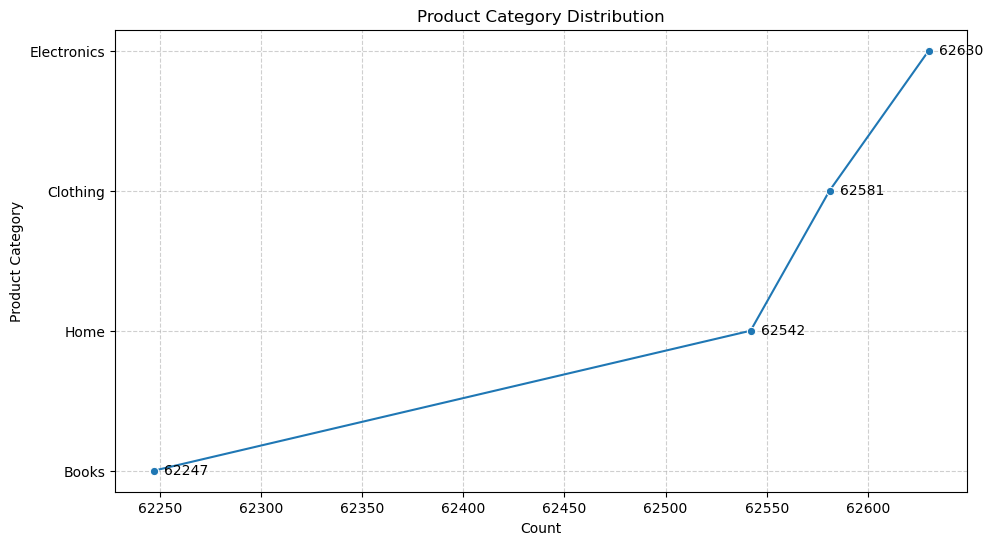

In [40]:
# Create a line chart with count points
plt.figure(figsize=(11, 6))
sns.lineplot(data=product_category_distribution, x='Count', y='Product Category', marker='o')
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.grid(True, linestyle='--', alpha=0.6)

# Add count annotations on the lines
for index, row in product_category_distribution.iterrows():
    plt.text(row['Count'] + 5, index, f'{row["Count"]}', va='center', fontsize=10)

plt.show()

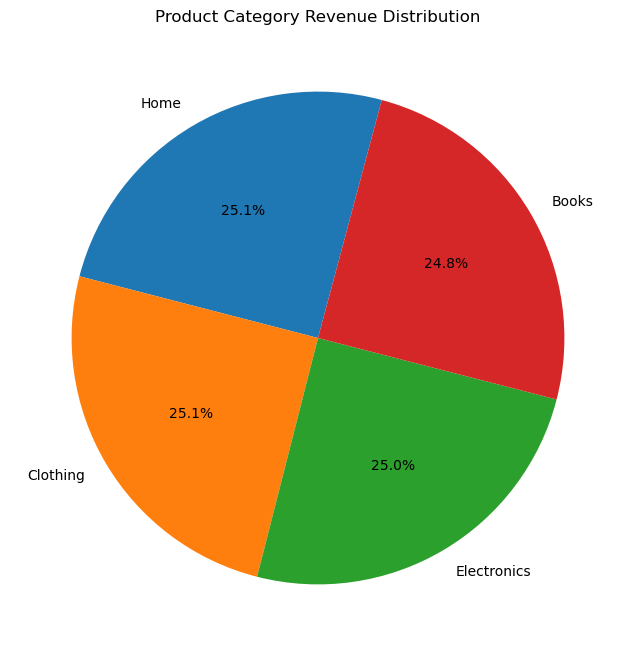

In [41]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(product_category_sales['Total Price'], labels=product_category_sales['Product Category'], autopct='%1.1f%%', startangle=75)

# Add a title
plt.title('Product Category Revenue Distribution')

# Display the chart
plt.show()


In [42]:
category_order = ["Electronics", "Clothing", "Home", "Books"]
total_revenue = df.groupby(['Product Category','Purchase Year'])['Total Price'].sum().reset_index()
total_revenue['Purchase Year'] = total_revenue['Purchase Year'].astype(str)

fig2 = px.bar(total_revenue, x='Product Category', y='Total Price',
              color='Purchase Year', barmode= 'group',
              color_discrete_sequence=px.colors.qualitative.Set2,
              category_orders={'Product Category': category_order},
              title = '2. Sales Revenue by Product Category and Year',
              labels={'Total Price': 'Total Price ($)'})
fig2.update_traces(texttemplate='%{y:$.4s}', textposition='inside', textangle=90)
fig2.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None,
                  width=700, height=500)
# display graph
fig2.show()

# RETURN ANALYSIS

In [43]:
return_rate = df['Returns'].mean()
print(f'Return Rate: {return_rate:.2%}')


Return Rate: 40.59%


In [44]:
total_lost_revenue = df[df['Returns'] == 1]['Total Price'].sum()
print(f'Total Lost Revenue due to Returns: ${total_lost_revenue:.2f}')

Total Lost Revenue due to Returns: $78161640.00


In [45]:
returned_data = df[df['Returns'] == 1]
not_returned_data = df[df['Returns'] == 0]

# Step 2: Analyze return rates by product category
return_rate_by_category = returned_data['Product Category'].value_counts() / df['Product Category'].value_counts()
return_rate_by_category

Product Category
Books          0.408148
Clothing       0.404308
Electronics    0.406323
Home           0.404848
Name: count, dtype: float64

# GENDER ANLYSIS

In [46]:
#stats of Gender and total price spent
gender_summary = df.groupby('Gender').agg(total_count=('Customer ID','size'),
                                            min_amount=('Total Price', 'min'),
                                            max_amount=('Total Price', 'max'),
                                            median_amount=('Total Price','median'),
                                            total_amount=('Total Price','sum'),
                                            average_amount =('Total Price','mean'),
                                            total_returned=('Returns','sum'),
                                            return_rates=('Returns','mean'),
                                            total_churned=('Churn','sum'),
                                            churn_rates=('Churn','mean')).reset_index()

gender_summary

,Gender,total_count,min_amount,max_amount,median_amount,total_amount,average_amount,total_returned,return_rates,total_churned,churn_rates
0,Female,124324,10,2500,605.0,95363311,767.054720,50284,0.404459,25067,0.201626
1,Male,125676,10,2500,604.0,96125354,764.866434,51192,0.407333,25063,0.199426


Text(0.5, 0.9, '1. Gender Distribution')

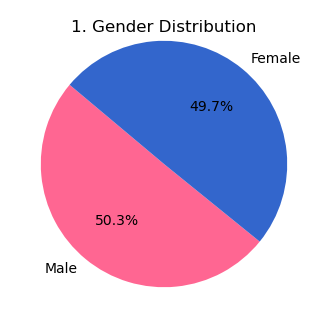

In [47]:
gender_count = df['Gender'].value_counts()
colors = ['#FF6692', '#3366CC'] 
plt.figure(figsize=(4, 4))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('1. Gender Distribution', y=0.9) 


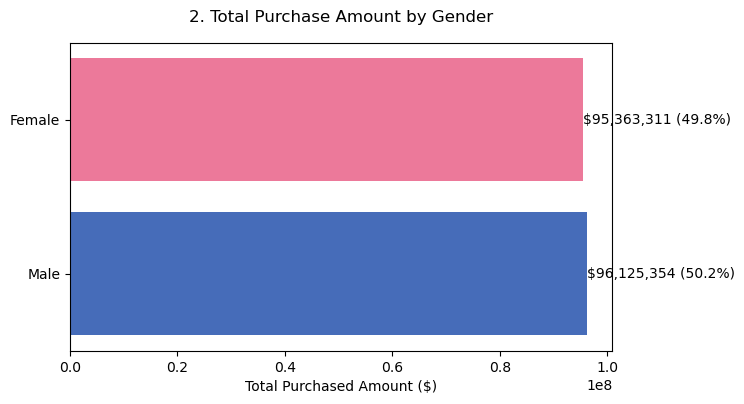

In [48]:
sum_amount = gender_summary['total_amount'].sum()
gender_summary['total_amount_percentage'] = (gender_summary['total_amount'] / sum_amount * 100).round(2)

plt.figure(figsize=(7, 4))
sns.barplot(data=gender_summary, x='total_amount', y='Gender', palette={'Female': '#FF6692', 'Male': '#3366CC'})
for index, row in gender_summary.iterrows():
    plt.text(row['total_amount'], index, f"${row['total_amount']:,} ({row['total_amount_percentage']}%)", 
             color='black', ha='left', va='center')
plt.title('2. Total Purchase Amount by Gender', pad=15)
plt.xlabel('Total Purchased Amount ($)')
plt.ylabel(None)
plt.show()


# AGE ANALYSIS

In [49]:
age_bins = [0,9,19,29,39,49,59,69,np.inf]
age_labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70+']

df['Age Group'] = pd.cut(df['Customer Age'], bins=age_bins, labels=age_labels) 
df[['Customer ID','Customer Age','Age Group']].sort_values('Customer Age', ascending=False)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3096\1648667589.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,Customer Age,Age Group
213450,27866,70,70+
76898,27353,70,70+
76896,27353,70,70+
76895,27353,70,70+
239854,5761,70,70+
...,...,...,...
157044,44571,18,10-19
83330,12369,18,10-19
93626,8277,18,10-19
93625,8277,18,10-19


In [50]:
age_group_gender_count = df[['Gender','Age Group']].value_counts().reset_index(name='Count')

fig1 = px.bar(age_group_gender_count, x='Age Group', y='Count', 
              color='Gender', barmode='group', 
              color_discrete_map={'Female': '#FF6692', 'Male': '#3366CC'},
              category_orders={'Age Group': age_labels},
              title='2. Age Distribution by Gender',
              text_auto=True)
fig1.update_layout(title={'x': 0.5, 'y': 0.9},
                   width=750, height=450,
                   xaxis_title= None,
                   legend_title=None,
                   legend=dict(orientation="h",yanchor="bottom",
                               y=1.02, xanchor="center",x=0.5))


In [52]:
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_labels, ordered=True)

# Count each age group
age_group_count = df['Age Group'].value_counts().sort_index().reset_index(name='Count')

# Calculate the percentage for each age group
age_group_count['Percentage'] = round(age_group_count['Count'] / age_group_count['Count'].sum()*100, 2)
age_group_count['Percentage Text'] = age_group_count['Percentage'].astype(str) + '%'
fig2 = px.line(age_group_count,x='Age Group', y='Count',
               title='1. Age Distribution',
               markers=True,
               text='Percentage Text',
               labels={'Count': 'Number of Customers'})

fig2.update_traces(textposition="top center") #adjust text position for percentages 
fig2.add_bar(x=age_group_count['Age Group'], y=age_group_count['Count'], text=age_group_count['Count'], textposition='inside', name='Count')
fig2.update_traces(textfont_color='white', selector=dict(type='bar'))
fig2.update_layout(title={'x': 0.5, 'y': 0.9},
                   xaxis_title= None,
                   yaxis_title= 'Count',
                   width=750, height=450, 
                   showlegend=False)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3096\2574272089.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# TIME SERIES ANALYSIS

In [53]:
# overview of yearly sales revenue
annual_sales_summary = df.groupby('Purchase Year')['Total Price'].agg(['min', 'max','mean','median','sum',])
annual_sales_summary

,min,max,mean,median,sum
Purchase Year,,,,,
2020,10,2500,766.229627,604.0,51931213
2021,10,2500,765.467205,608.0,51594786
2022,10,2500,766.071850,600.0,51774966
2023,10,2500,766.088024,604.0,36187700


In [54]:
# Set month names in order and dtype to category
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df['Purchase Month'] = pd.Categorical(df['Purchase Month'], 
                                        categories=month_order, 
                                        ordered=True)

# Calculate the total and average of monthly sales revenue
monthly_sales =df.groupby(['Purchase Year', 'Purchase Month']).agg(Count=('Customer ID', 'size'),
                                                                      Total_Revenue=('Total Price', 'sum'),
                                                                      Avg_Revenue=('Total Price', 'mean')).reset_index()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3096\2515360097.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
## 1. Monthly count of orders, split by years

monthly_sales['Purchase Year'] = monthly_sales['Purchase Year'].astype(str)

fig1 = px.bar(monthly_sales, x='Purchase Month', y='Count', 
               color='Purchase Year', facet_row='Purchase Year',
               title='1. Number of Orders per Month (by Year)', 
               labels={'Count': 'Order Count', 'Purchase Year': 'Year'},
               hover_data={'Count': ':,.0f'},
               text_auto=True)

fig1.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None, 
                  width=650, height=600,
                  showlegend=False)

fig1.show()

In [56]:
## 1. Monthly count of orders, split by years

monthly_sales['Purchase Year'] = monthly_sales['Purchase Year'].astype(str)

fig1 = px.bar(monthly_sales, x='Purchase Month', y='Count', 
               color='Purchase Year', facet_row='Purchase Year',
               title='1. Number of Orders per Month (by Year)', 
               labels={'Count': 'Order Count', 'Purchase Year': 'Year'},
               hover_data={'Count': ':,.0f'},
               text_auto=True)

fig1.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None, 
                  width=650, height=600,
                  showlegend=False)

fig1.show()

In [57]:
## 3. Compare average monthly sales
fig3 = px.line(monthly_sales, x='Purchase Month', y='Avg_Revenue', 
              color='Purchase Year', facet_col='Purchase Year',
              color_discrete_sequence=px.colors.qualitative.Set2,
              title='3. Average Monthly Sales Revenue (by Year)',
              labels={'Avg_Revenue': 'Average Revenue ($)', 'Purchase Year': 'Year'},
              hover_data={'Avg_Revenue': ':$,.0f'},
              markers=True)

fig3.update_yaxes(tickprefix="$")

fig3.update_layout(title={'x': 0.5, 'y': 0.9},
                  xaxis_title= None,
                  xaxis2_title= None,
                  xaxis3_title= None,
                  xaxis4_title= None,
                  width=800, height=350,
                  yaxis=dict(range=[700, 840]), 
                  showlegend=False)

fig3.show()

# CLUSTERING

In [58]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns


customer_data = df.groupby('Customer Name').agg({
    'Total Price': ['sum', 'mean'],
    'Returns': 'sum',
    'Churn': 'max'
}).reset_index()
customer_data.columns = ['Customer Name', 'Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Total Purchases', 'Average Purchase Amount', 'Total Returns', 'Churn Status']])

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data_imputed)

# Analyze other metrics by cluster
cluster_summary = customer_data.groupby('Cluster').agg({
    'Total Purchases': 'mean',
    'Average Purchase Amount': 'mean',
    'Total Returns': 'mean',
    'Churn Status': 'mean'
}).reset_index()

print(cluster_summary)
import plotly.express as px

# Assuming 'customer_data' is your DataFrame with the clustering results
fig = px.scatter(customer_data, x='Total Purchases', y='Average Purchase Amount',
                 color='Cluster', title='Customer Segmentation based on Total Purchases and Average Purchase Amount',
                 labels={'Cluster': 'Cluster Group'})

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   Cluster  Total Purchases  Average Purchase Amount  Total Returns  \
0        0      4342.700020               765.559052       2.302152   
1        1      6272.962893               769.392611       3.321632   

   Churn Status  
0      0.000000  
1      0.980392  
